In [9]:
    import pandas as pd
    import numpy as np
    data= pd.read_excel('D:GC/05_data1.xlsx')
    data

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
2996,7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
2997,7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0
2998,7652,42,1,9,180,90,97.0,148,90,101,235,232,43.0,145,16.6,0.7,1,1


In [2]:
data.isnull().sum()


no               0
city_code        0
gender           0
age_code         0
height           0
weight           0
waist            0
systolic         0
diastolic        0
blood_sugar      0
cholesterol      0
triglycerides    0
HDL              0
LDL              0
hemoglobin       0
serum            0
smoking          0
drinking         0
dtype: int64

In [3]:
data.columns


Index(['no', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'systolic', 'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides',
       'HDL', 'LDL', 'hemoglobin', 'serum', 'smoking', 'drinking'],
      dtype='object')

In [5]:
newdata=data.loc[:,['gender','height','weight','blood_sugar']]
newdata


NameError: name 'data' is not defined

In [18]:
newdata.loc[data['gender']==1,['gender']]='M'
newdata.loc[data['gender']==2,['gender']]='F'
newdata.loc[data['blood_sugar']>=120,['blood_sugar']]='over'
newdata.loc[data['blood_sugar']<120,['blood_sugar']]='under'
weight=data['weight']
height=data['height']/100
bmi=weight/(height**2)

In [3]:
newdata.loc[bmi >= 25, 'bmi'] = 'Fat'
newdata.loc[(bmi >= 23) & (bmi < 25), 'bmi'] = 'overweight'
newdata.loc[bmi < 23, 'bmi'] = 'normal'

newdata

NameError: name 'newdata' is not defined

In [20]:
blood_sugar=newdata.groupby(['gender','blood_sugar'])['blood_sugar'].count()
blood_sugar=blood_sugar.to_frame(name='count')
blood_sugar=blood_sugar.reset_index()

blood_sugar

,gender,blood_sugar,count
0,F,over,145
1,F,under,1354
2,M,over,276
3,M,under,1225


In [37]:
bmi_count=newdata.groupby(['gender','bmi'])['bmi'].count()
bmi_count=bmi_count.to_frame(name='count')
bmi_count=bmi_count.reset_index()

bmi_count

,gender,bmi,count
0,F,Fat,408
1,F,normal,789
2,F,overweight,302
3,M,Fat,672
4,M,normal,443
5,M,overweight,386


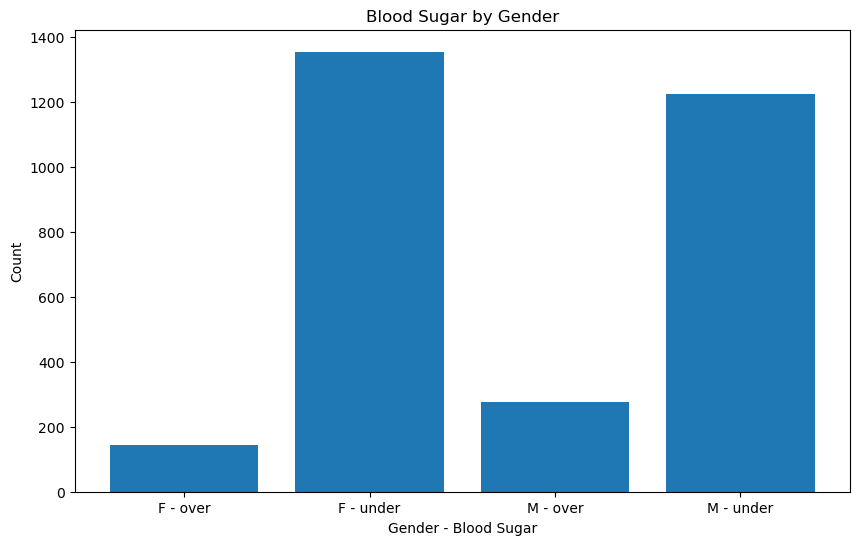

In [32]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.bar(blood_sugar['gender'] + ' - ' + blood_sugar['blood_sugar'], blood_sugar['count'])
plt.xlabel('Gender - Blood Sugar')
plt.ylabel('Count')
plt.title('Blood Sugar by Gender')
plt.show()

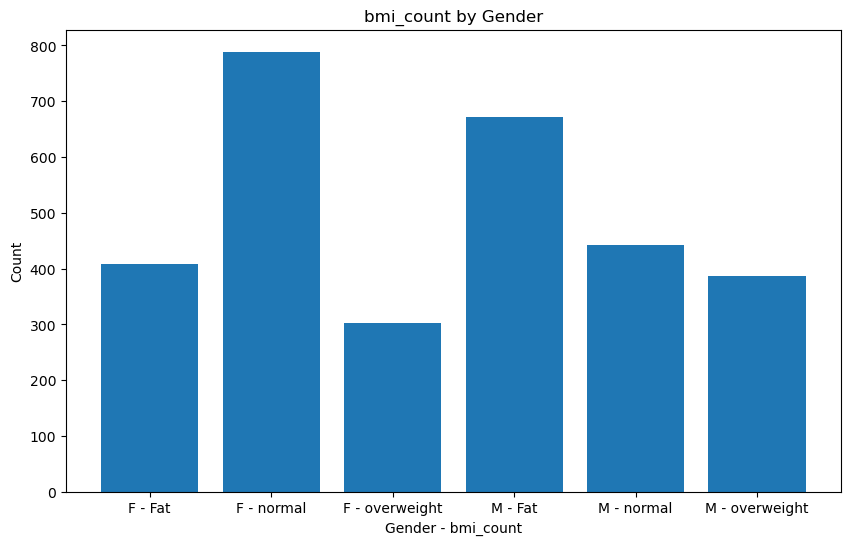

In [38]:
plt.figure(figsize=(10, 6))

plt.bar(bmi_count['gender'] + ' - ' + bmi_count['bmi'], bmi_count['count'])
plt.xlabel('Gender - bmi_count')
plt.ylabel('Count')
plt.title('bmi_count by Gender')
plt.show()